# ***柏頓．墨基爾(Burton G. Malkiel)成功選股法則***
## **大師簡介**
---
柏頓．墨基爾(Burton G. Malkiel)是普林斯頓大學(Princeton University)華友銀行的講座教授(Chemical Bank Chairman's Professor of Economic)曾任職於史密斯巴尼(Smith Barney & Co.)投資銀行部門及數家大型投資機構的董事，如先鋒集團(Vanguard Group of Investment Companies),保德信人壽(Prudential Insurance Company of America)等，也曾獲聘為美國總統經濟諮詢委員會的委員，在學術界及投資界，皆是各方敬重的翹楚。柏頓．墨基爾最為人知的是於1973年出版的著作【漫步華爾街】(A Random Walk down Wall Street- Including A life-cycle Guide to Personal Investing)，至今仍持續再版，是華爾街影響力量最深遠的名著之一；基本面上，柏頓．墨基爾是隨機漫步理論(Random Walk)的支持者，他認為效率市場假說(EMT)雖然有瑕疵，但大體上是正確的，而傳統的磐石理論(Firm Foundation theory，如價值投資)及空中樓閣理論(Castle-in-the-air theory，如技術分析)並無任何預測未來的能力，成功的基金經理人如鳳毛鱗爪，大部份是靠運氣，因此他認為投資比較像藝術，而非科學，但他在漫步華爾街一書，也提出一些投資者在面對市場時的投資之道，以供投資者遵循。

### **墨基爾認為在磐石理論中股價決定因素主要有以下幾個**

- 預期成長率：理性投資人願意為較高的【股利成長率】付出較高的代價。
- 預期發放的股利：在其他情況相同的條件下，理性投資人願意出較高的代價購買【現金股利佔公司盈餘較高】的公司。
- 風險程度：理性投資人願意為風險較低的股票，付出較高的代價。
- 市場利率水準：理性投資人在利率愈低時，願意付出的股價愈高。

### **但有以下三個原因使這些預期很難精準**

- 對未來的預期無法在目前證實
- 不確定的資料無法求出精確的數字
- 市場對基本因素的反應具時變性，成長並不必然轉化為價值提升。

### **提高勝率的三大方法**

所以他認為投資人要投資成功，有三種方法，(一)購買指數型基金，(二)尋找傑出的基金經理人請他代打，(三)深思熟慮的自行投資，並且大多數時候他比較傾向第一種，但如果你真的很希望能夠親自參與市場行情的話，他提出了以下操作建議：

- 尋找未來五年能持續超越市場平均盈餘成長的企業
- 不要購買股價高於合理真實價值的股票，所以要找本益比 (PER) 小於市場平均值的公司
- 購買有題材讓投資人建築空中樓閣的股票，但這點屬於主觀判斷，在沒有AI的早年比較難自動化。
- 儘可能減少進出

## **如何應用在台股策略**
---
### **使用的參數**

基於墨基爾的理念，我們加上了一些針對台股市場的調整完成一下策略，使用的參數如下表

| columns | En                         | Ch      | Note   |
| ------- | -------------------------- | ------- | ---------- |
| per     | PER_TWSE               | 本益比 | 越小越好（估值越低） |
| r401    | Sales_Growth_Rate_TTM      | 營收成長率TTM   | 越高越好 |
| r405    | Net_Income_Growth_Rate_TTM | 稅後淨利成長率TTM | 越高越好 |

雖然墨基爾認為預期的成長與股利發放是決定股價的重要因素，但他並不認為所謂的分析師市場共識具有足夠的準確度，因此不鼓勵投資人納入模型。

### **選股流程**
```plaintext
每隔120天重複執行以下流程
抓取上市櫃全部公司 → 依產業分類統計公司數
   ├─ 產業公司數 < 40 → 排除該產業所有公司
   └─ 產業公司數 ≥ 40 → 進入篩選流程
        ├─ 1. Sales_Growth_Rate_TTM                 ≥ 　　產業平均
        ├─ 2. Sales_Growth_goodtimes                ≥ 　　2 (過去四年至少有兩年高於產業平均)
        ├─ 3. Net_Income_Growth_Rate_TTM            ≥ 　　產業平均
        ├─ 4. Net_Income_Growth_Rate_TTM_shift_1y   ≥ 　　產業平均 (前一年度)
        └─ 5. Net_Income_Growth_goodtimes           ≥ 　　3 (過去四年至少有三年高於產業平均)
                └─ 通過以上5項 → 依 PER_Position 排序取前 30 小 → 建立投資組合
```

為了捕捉過去與現在的營收與獲利表現，我們使用 近四年營收成長率與稅後淨利成長率相對於產業平均的表現 來衡量企業的持續成長力。具體而言，若公司在過去四年間有至少兩年營收成長高於產業平均，且至少三年淨利成長優於同業，則視為具備穩定成長特質。最後，在符合上述標準的公司中，依照 PER_Position（本益比排序位置）由小到大排列，選取估值相對最低的前 30 檔股票納入投資組合，並每 120 天重新平衡一次，以維持組合的基本面優勢。

## 載入套件

In [ ]:
#%% Package

import pandas as pd
import numpy as np
import tejapi
import os
import json
import matplotlib.pyplot as plt
import yaml

''' ------------------- 不使用 config.yaml 管理 API KEY 的使用者可以忽略以下程式碼 -------------------'''
notebook_dir = os.path.dirname(os.path.abspath(__file__)) if '__file__' in globals() else os.getcwd()
yaml_path = os.path.join(notebook_dir, '..', 'config.yaml')
yaml_path = os.path.abspath(os.path.join(notebook_dir, '..', 'config.yaml'))
with open(yaml_path, 'r') as tejapi_settings: config = yaml.safe_load(tejapi_settings)
''' ------------------- 不使用 config.yaml 管理 API KEY 的使用者可以忽略以上程式碼 -------------------'''

# ----------------------------------------------------------------------------------------------------
KEY = config['TEJAPI_KEY']      # = "https://api.tej.com.tw"
BAS = config['TEJAPI_BASE']     # = "YOUR_API_KEY

tejapi.ApiConfig.api_key  = KEY
tejapi.ApiConfig.api_base = BAS
os.environ['TEJAPI_BASE'] = BAS
os.environ['TEJAPI_KEY']  = KEY
# ----------------------------------------------------------------------------------------------------

from zipline.sources.TEJ_Api_Data import get_universe
import TejToolAPI
from zipline.data.run_ingest import simple_ingest
from zipline.api import set_slippage, set_commission, set_benchmark,  symbol,  record, order_target_percent
from zipline.finance import commission, slippage
from zipline import run_algorithm

from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.family'] = 'Arial'


In [ ]:
#%% Note
'''-------------------------------------------------------------------------------------------------------------------------------------
columns    |En                                         |Ch
----------------------------------------------------------------------------------------------------------------------------------------
per         PER_TWSE                                   本益比（越小越好）
r401        Sales_Growth_Rate_TTM                      營收成長率
r405        Net_Income_Growth_Rate_TTM                 稅後淨利成長率
-------------------------------------------------------------------------------------------------------------------------------------'''

# 股票池條件
'''-------------------------------------------------------------------------------------------------------------------------------------
1. Sales_Growth_Rate_TTM                                ≥ 產業平均值
2. Sales_Growth_goodtimes                               ≥ 2（過去四年中至少兩年高於產業平均）
3. Net_Income_Growth_Rate_TTM                           ≥ 產業平均值
4. Net_Income_Growth_Rate_TTM_shift_1y                  ≥ 產業平均值（前一年度）
5. Net_Income_Growth_goodtimes                          ≥ 3（過去四年中至少三年高於產業平均）
6. 通過以上五項條件之公司，選取 PER_Position 前 30 小的公司組成投資組合。
-------------------------------------------------------------------------------------------------------------------------------------'''

# 額外設定
'''-------------------------------------------------------------------------------------------------------------------------------------
產業最小公司數：40 (< 40 的產業直接忽略)
再平衡頻率：120 天
-------------------------------------------------------------------------------------------------------------------------------------'''


'-------------------------------------------------------------------------------------------------------------------------------------\n產業最小公司數：40 (≥ 40 的產業直接忽略)\n再平衡頻率：120 天\n-------------------------------------------------------------------------------------------------------------------------------------'

## main

In [ ]:
#%% 參數設定
# py ==================================================================================================================
date_start_data     = '2015-01-01' # 會需要的資料起始日 (至少要設定比 data_start_pool 還早五年)
date_start_pool     = '2020-01-01' # 回測起始日
date_end            = '2025-07-18'

re_days = 120
# ---------------------------------------------------------------------------------------------------------------------
start_dt    = pd.Timestamp(date_start_data, tz='UTC')
end_dt      = pd.Timestamp(date_end, tz='UTC')

In [ ]:
#%% 篩選股票池 & 匯入回測資料

# 使用get_universe 篩選股票池
pool = get_universe(
    start   = date_start_pool,
    end     = date_end,
    mkt_bd_e= ['TSE', 'OTC'],
    stktp_e = ['Common Stock-Foreign','Common Stock']
    )

pools           = pool + ['IR0001', 'IR0043']       # 加入大盤與櫃買指數

# simple_ingest 匯入回測資料
simple_ingest(name = 'tquant' , tickers = pools , start_date = date_start_data , end_date = date_end)

Currently used TEJ API key call quota 638/1000000 (0.06%)
Currently used TEJ API key data quota 73856697/100000000 (73.86%)
Now ingesting data.
End of ingesting tquant.
Please call function `get_bundle(start_dt = pd.Timestamp('2015-01-01', tz = 'utc'),end_dt = pd.Timestamp('2025-07-18' ,tz = 'utc'))` in `zipline.data.data_portal` to check data.
Currently used TEJ API key call quota 644/1000000 (0.06%)
Currently used TEJ API key data quota 82593426/100000000 (82.59%)
End of ingesting tquant.
Please call function `get_bundle(start_dt = pd.Timestamp('2015-01-01', tz = 'utc'),end_dt = pd.Timestamp('2025-07-18' ,tz = 'utc'))` in `zipline.data.data_portal` to check data.
Currently used TEJ API key call quota 644/1000000 (0.06%)
Currently used TEJ API key data quota 82593426/100000000 (82.59%)


In [ ]:
#%% 抓取歷史數據

c_use = [
    'coid', 'mkt', 'main_ind_e', 'open_d', 'high_d', 'low_d', 'close_d',
    'precls', 'vol', 'amt', 'roi',
    'short_ta', 'qfii_pct', 'per', 'r401', 'r405'
    ]

# 使用 get_history_data 歷史數據
data_dttm = TejToolAPI.get_history_data(
    start   = start_dt,
    end     = end_dt,
    ticker  = pool + ['IR0001'],
    fin_type= ['TTM'],
    columns = c_use,
    transfer_to_chinese = False
    )
print(data_dttm.info())

data_dttm = data_dttm.sort_values(['mdate', 'coid'])

Currently used TEJ API key call quota 845/1000000 (0.08%)
Currently used TEJ API key data quota 96729893/100000000 (96.73%)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345665 entries, 0 to 4345664
Data columns (total 17 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   coid                                 object        
 1   mdate                                datetime64[ms]
 2   Qfii_Stock_Holding_Pct               float64       
 3   Margin_Short_Balance_Amt             float64       
 4   Industry_Eng                         object        
 5   Low                                  float64       
 6   Close                                float64       
 7   PER_TWSE                             float64       
 8   Value_Dollars                        float64       
 9   High                                 float64       
 10  ROI                                  float64       
 11  Open             

In [ ]:
#%% 備份歷史數據

# data_dttm -> data_use，資料損毀時可以直接取用
data_use = data_dttm.copy()
data_use.rename(columns={'Industry_Eng':'Industry'}, inplace=True)
data_use

,coid,mdate,Qfii_Stock_Holding_Pct,Margin_Short_Balance_Amt,Industry,Low,Close,PER_TWSE,Value_Dollars,High,ROI,Open,Volume_1000_Shares,Market,Previous_Day_Closing_Price_Per_Unit,Net_Income_Growth_Rate_TTM,Sales_Growth_Rate_TTM
1549,1101,2015-01-05,35.82,11093.85,M1100 Cement,42.80,43.00,14.88,1.222445e+08,43.40,-0.9217,43.40,2842.0,TWSE,NaN,21.06,8.24
103279,1102,2015-01-05,20.48,1878.96,M1100 Cement,38.10,38.25,13.91,1.137760e+08,38.90,-1.9231,38.90,2967.0,TWSE,43.80,31.96,15.68
204850,1103,2015-01-05,5.73,1011.00,M1100 Cement,13.90,14.25,7.74,8.256203e+06,14.25,0.7067,14.15,587.0,TWSE,NaN,319.11,-1.84
306156,1104,2015-01-05,15.53,696.44,M1100 Cement,25.60,26.00,11.40,1.070997e+07,26.00,0.7752,25.95,415.0,TWSE,28.75,61.91,12.72
407504,1108,2015-01-05,3.09,414.88,M1100 Cement,10.25,10.40,13.33,2.577425e+06,10.45,0.9709,10.30,248.0,TWSE,NaN,71.18,7.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766673,9955,2025-07-18,0.94,5793.99,M3500 TSE Green Energy and Environmental Services,28.30,28.30,157.00,4.931078e+06,28.70,-0.8757,28.70,173.0,TWSE,NaN,-76.77,3.99
3846407,9958,2025-07-18,11.65,69262.25,M2000 Iron and Steel,199.00,200.00,34.90,4.559791e+08,204.00,-0.7444,203.50,2277.0,TWSE,68.50,-1.54,-11.65
3926121,9960,2025-07-18,8.82,0.00,OTC37 OTC Sports and Leisure,24.35,24.40,12.71,3.423460e+05,24.50,0.0000,24.50,14.0,OTC,NaN,-21.91,-4.46
4003614,9962,2025-07-18,0.24,0.00,OTC20 OTC Steel,12.05,12.25,16.78,2.356820e+05,12.30,0.4098,12.20,19.0,OTC,NaN,-15.12,-21.04


In [ ]:
#%% 合併上市櫃公司的產業定義

# Get unique Industry
df_unique = pd.DataFrame(
    sorted(data_use['Industry'].astype(str).unique()),
    columns=['Industry']
)

df_unique['Industry'] = df_unique['Industry'].astype('object')

df_unique.dropna(inplace=True)

df_unique = df_unique[df_unique.apply(lambda x: x.astype(str).str.strip().ne('').all(), axis=1)]

# Extract 'Indu_Code' and 'Indu_Name'
df_unique[['Indu_Code', 'Indu_Name']] = df_unique['Industry'].str.extract(r'^([A-Z0-9]+)\s+(.+)$')

df_unique['Exch'] = df_unique['Industry'].apply(lambda x: 'TSE' if x.startswith('M') else ('OTC' if x.startswith('OTC') else None))

df_unique.dropna(subset=['Exch'], inplace=True)

# 合併上市與上櫃公司的產業分類
def create_unicode_with_exceptions(row):
    industry_code = row['Indu_Code']
    industry_name = row['Indu_Name']

    if pd.isna(industry_code) or pd.isna(industry_name):
        return pd.Series([None, None], index=['Unicode', 'UniIndu'])

    exceptions = {
        'OTC30': 'U2800',
        'OTC32': 'U9900',
        'OTC33': 'U1700',
        'OTC34': 'U3600',
        'OTC89': 'U9900'
    }

    if industry_code in exceptions:
        unicode_val = exceptions[industry_code]
    elif industry_code.startswith('OTC'):
        number = ''.join(filter(str.isdigit, industry_code))
        unicode_val = 'U' + str(int(number) * 100).zfill(4)
    else:
        number = ''.join(filter(str.isdigit, industry_code))
        unicode_val = 'U' + number.zfill(4)

    return pd.Series([unicode_val, industry_name], index=['Unicode', 'UniIndu'])

df_unique[['Unicode', 'UniIndu']] = df_unique.apply(create_unicode_with_exceptions, axis=1)


tse_names = df_unique[df_unique['Exch'] == 'TSE'].set_index('Unicode')['Indu_Name']
df_unique['Uniname'] = df_unique['Unicode'].map(tse_names).fillna(df_unique['Indu_Name'])
df_unique.dropna()

# Merge back to data_use
data_use = data_use.merge(df_unique[['Industry', 'Unicode', 'Uniname']], on='Industry', how='left')

data_use.dropna()

print(data_use[['Uniname', 'Unicode']].drop_duplicates())

data_use

                                             Uniname Unicode
0                                             Cement   U1100
7                                              Foods   U1200
28                                           Tourism   U2700
29                                          Plastics   U1300
41             Chemical Biotechnology & Medical Care   U1700
48                                       Electronics   U2300
51                                        Automobile   U2200
54                                          Textiles   U1400
66                                            Others   U9900
67                Building Material and Construction   U2500
103                               Electric Machinery   U1500
124                                   Iron and Steel   U2000
152                             Electrical and Cable   U1600
207                               Glass and Ceramics   U1800
216                                   Paper and Pulp   U1900
257                     

,coid,mdate,Qfii_Stock_Holding_Pct,Margin_Short_Balance_Amt,Industry,Low,Close,PER_TWSE,Value_Dollars,High,ROI,Open,Volume_1000_Shares,Market,Previous_Day_Closing_Price_Per_Unit,Net_Income_Growth_Rate_TTM,Sales_Growth_Rate_TTM,Unicode,Uniname
0,1101,2015-01-05,35.82,11093.85,M1100 Cement,42.80,43.00,14.88,1.222445e+08,43.40,-0.9217,43.40,2842.0,TWSE,NaN,21.06,8.24,U1100,Cement
1,1102,2015-01-05,20.48,1878.96,M1100 Cement,38.10,38.25,13.91,1.137760e+08,38.90,-1.9231,38.90,2967.0,TWSE,43.80,31.96,15.68,U1100,Cement
2,1103,2015-01-05,5.73,1011.00,M1100 Cement,13.90,14.25,7.74,8.256203e+06,14.25,0.7067,14.15,587.0,TWSE,NaN,319.11,-1.84,U1100,Cement
3,1104,2015-01-05,15.53,696.44,M1100 Cement,25.60,26.00,11.40,1.070997e+07,26.00,0.7752,25.95,415.0,TWSE,28.75,61.91,12.72,U1100,Cement
4,1108,2015-01-05,3.09,414.88,M1100 Cement,10.25,10.40,13.33,2.577425e+06,10.45,0.9709,10.30,248.0,TWSE,NaN,71.18,7.95,U1100,Cement
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4345660,9955,2025-07-18,0.94,5793.99,M3500 TSE Green Energy and Environmental Services,28.30,28.30,157.00,4.931078e+06,28.70,-0.8757,28.70,173.0,TWSE,NaN,-76.77,3.99,U3500,TSE Green Energy and Environmental Services
4345661,9958,2025-07-18,11.65,69262.25,M2000 Iron and Steel,199.00,200.00,34.90,4.559791e+08,204.00,-0.7444,203.50,2277.0,TWSE,68.50,-1.54,-11.65,U2000,Iron and Steel
4345662,9960,2025-07-18,8.82,0.00,OTC37 OTC Sports and Leisure,24.35,24.40,12.71,3.423460e+05,24.50,0.0000,24.50,14.0,OTC,NaN,-21.91,-4.46,U3700,TSE Sports and Leisure
4345663,9962,2025-07-18,0.24,0.00,OTC20 OTC Steel,12.05,12.25,16.78,2.356820e+05,12.30,0.4098,12.20,19.0,OTC,NaN,-15.12,-21.04,U2000,Iron and Steel


In [ ]:
#%% 檢視全樣本產業公司數 | 實際運算時每次都會判斷一次

# Note: 由於電子業規模龐大，可考慮使用子產業，這裡用產業示範

import warnings
import matplotlib.pyplot as plt

# 中文字體設定
warnings.filterwarnings("ignore", message="findfont")
plt.rcParams['font.family'] = 'Microsoft JhengHei'
plt.rcParams['axes.unicode_minus'] = False

# 去掉 Industry 是 '其他' 的公司
df = data_use[(data_use['Unicode'] != 'U9900') & data_use['Unicode'].notna()]

# 只保留每間公司 (coid) 的唯一組合
unique_companies = df[['coid', 'Uniname']].drop_duplicates()

# 計算每個產業的公司數占比
industry_company_no = unique_companies['Uniname'].value_counts()

# 去掉公司數小於40的產業 | 僅畫圖時有效，稍後計算要使用 industry_list 再刪一次 data_use
#　industry_company_no = industry_company_no[industry_company_no >= 40]
print(industry_company_no)

# 避免前視偏誤，改次再平衡都判斷一次
# # 回傳 list 用來篩選 data_use
# industry_list = industry_company_no.index.tolist()                                      # list of Uniname
# industry_list = df[df['Uniname'].isin(industry_list)]['Unicode'].unique().tolist()      # list of Unicode

Uniname
Electronics                                    971
Chemical Biotechnology & Medical Care          205
Electric Machinery                             121
Building Material and Construction              87
Textiles                                        60
Tourism                                         52
Iron and Steel                                  50
Financial Industry                              44
Automobile                                      40
Trading and Consumers' Goods                    39
Foods                                           33
Shipping and Transportation                     33
TSE Green Energy and Environmental Services     33
TSE Household                                   31
Plastics                                        29
TSE Sports and Leisure                          27
TSE Digital and Cloud Services                  27
Electrical and Cable                            17
Rubber                                          13
Oil Gas, and Electricit

In [ ]:
#%% 計算財務指標

# Data fillter & sort

# data_use = data_use[data_use['Unicode'].isin(industry_list)]
data_use = data_use.sort_values(['coid', 'mdate'])

# Sales_Growth_Rate_TTM
data_use['Sales_Growth_Rate_TTM_shift_1y'] = data_use.groupby('coid')['Sales_Growth_Rate_TTM'].transform(lambda x: x.shift(252 * 1))
data_use['Sales_Growth_Rate_TTM_shift_2y'] = data_use.groupby('coid')['Sales_Growth_Rate_TTM'].transform(lambda x: x.shift(252 * 2))
data_use['Sales_Growth_Rate_TTM_shift_3y'] = data_use.groupby('coid')['Sales_Growth_Rate_TTM'].transform(lambda x: x.shift(252 * 3))
data_use['Sales_Growth_Rate_TTM_shift_4y'] = data_use.groupby('coid')['Sales_Growth_Rate_TTM'].transform(lambda x: x.shift(252 * 4))

# Net_Income_Growth_Rate_TTM
data_use['Net_Income_Growth_Rate_TTM_shift_1y'] = data_use.groupby('coid')['Net_Income_Growth_Rate_TTM'].transform(lambda x: x.shift(252 * 1))
data_use['Net_Income_Growth_Rate_TTM_shift_2y'] = data_use.groupby('coid')['Net_Income_Growth_Rate_TTM'].transform(lambda x: x.shift(252 * 2))
data_use['Net_Income_Growth_Rate_TTM_shift_3y'] = data_use.groupby('coid')['Net_Income_Growth_Rate_TTM'].transform(lambda x: x.shift(252 * 3))
data_use['Net_Income_Growth_Rate_TTM_shift_4y'] = data_use.groupby('coid')['Net_Income_Growth_Rate_TTM'].transform(lambda x: x.shift(252 * 4))

# PER_Position

data_use['PER_Position'] = data_use['PER_TWSE'] / data_use.groupby(['mdate', 'Unicode'])['PER_TWSE'].transform('mean')

print(data_use.info())
data_use

<class 'pandas.core.frame.DataFrame'>
Index: 4345665 entries, 0 to 4345664
Data columns (total 28 columns):
 #   Column                               Dtype         
---  ------                               -----         
 0   coid                                 object        
 1   mdate                                datetime64[ms]
 2   Qfii_Stock_Holding_Pct               float64       
 3   Margin_Short_Balance_Amt             float64       
 4   Industry                             object        
 5   Low                                  float64       
 6   Close                                float64       
 7   PER_TWSE                             float64       
 8   Value_Dollars                        float64       
 9   High                                 float64       
 10  ROI                                  float64       
 11  Open                                 float64       
 12  Volume_1000_Shares                   float64       
 13  Market                          

,coid,mdate,Qfii_Stock_Holding_Pct,Margin_Short_Balance_Amt,Industry,Low,Close,PER_TWSE,Value_Dollars,High,...,Uniname,Sales_Growth_Rate_TTM_shift_1y,Sales_Growth_Rate_TTM_shift_2y,Sales_Growth_Rate_TTM_shift_3y,Sales_Growth_Rate_TTM_shift_4y,Net_Income_Growth_Rate_TTM_shift_1y,Net_Income_Growth_Rate_TTM_shift_2y,Net_Income_Growth_Rate_TTM_shift_3y,Net_Income_Growth_Rate_TTM_shift_4y,PER_Position
0,1101,2015-01-05,35.82,11093.85,M1100 Cement,42.80,43.00,14.88,1.222445e+08,43.40,...,Cement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.687570
1467,1101,2015-01-06,35.76,12111.56,M1100 Cement,42.10,42.25,14.62,3.241500e+08,42.60,...,Cement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.680905
2935,1101,2015-01-07,35.61,11781.11,M1100 Cement,41.85,42.10,14.57,3.681716e+08,42.55,...,Cement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.680523
4403,1101,2015-01-08,35.49,12274.87,M1100 Cement,42.10,42.25,14.62,3.694259e+08,42.65,...,Cement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.682631
5871,1101,2015-01-09,35.28,13962.36,M1100 Cement,41.80,41.80,14.46,4.413335e+08,42.60,...,Cement,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.672603
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338144,IR0001,2025-07-14,NaN,NaN,,50780.80,50982.13,NaN,2.815126e+11,51253.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4340024,IR0001,2025-07-15,NaN,NaN,,50940.09,51498.65,NaN,3.198706e+11,51616.56,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4341904,IR0001,2025-07-16,NaN,NaN,,51704.05,51974.20,NaN,3.912950e+11,52117.51,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4343784,IR0001,2025-07-17,NaN,NaN,,51732.35,52160.94,NaN,3.435598e+11,52265.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#%% 計算選股積分
'''
這段程式會先計算每家公司在過去四年（1y~4y）各年度的營收或淨利成長率是否高於同產業平均，若高於則標記為 1 ，否則 0 ，
最後把四年的結果相加成一個「goodtimes」欄位，用來統計該公司在四年間高於產業平均的次數。
'''

# 計算某指標過去比產業平均高的次數
def cal_goodtimes(data_use, factor):
    i = factor

    for y in range(1,5):
        data_use[f'{i}_good_{y}y'] = np.where(
        data_use[f'{i}_Rate_TTM_shift_{y}y'] >=
        data_use.groupby(['mdate', 'Unicode'])[f'{i}_Rate_TTM_shift_{y}y'].transform('mean'), 1, 0
        )

    data_use[f'{i}_goodtimes'] = sum(data_use[f'{i}_good_{y}y'] for y in range(1, 5))
    return data_use

data_use = cal_goodtimes(data_use, 'Sales_Growth')
data_use = cal_goodtimes(data_use, 'Net_Income_Growth')

data_use

,coid,mdate,Qfii_Stock_Holding_Pct,Margin_Short_Balance_Amt,Industry,Low,Close,PER_TWSE,Value_Dollars,High,...,Sales_Growth_good_1y,Sales_Growth_good_2y,Sales_Growth_good_3y,Sales_Growth_good_4y,Sales_Growth_goodtimes,Net_Income_Growth_good_1y,Net_Income_Growth_good_2y,Net_Income_Growth_good_3y,Net_Income_Growth_good_4y,Net_Income_Growth_goodtimes
0,1101,2015-01-05,35.82,11093.85,M1100 Cement,42.80,43.00,14.88,1.222445e+08,43.40,...,0,0,0,0,0,0,0,0,0,0
1467,1101,2015-01-06,35.76,12111.56,M1100 Cement,42.10,42.25,14.62,3.241500e+08,42.60,...,0,0,0,0,0,0,0,0,0,0
2935,1101,2015-01-07,35.61,11781.11,M1100 Cement,41.85,42.10,14.57,3.681716e+08,42.55,...,0,0,0,0,0,0,0,0,0,0
4403,1101,2015-01-08,35.49,12274.87,M1100 Cement,42.10,42.25,14.62,3.694259e+08,42.65,...,0,0,0,0,0,0,0,0,0,0
5871,1101,2015-01-09,35.28,13962.36,M1100 Cement,41.80,41.80,14.46,4.413335e+08,42.60,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4338144,IR0001,2025-07-14,NaN,NaN,,50780.80,50982.13,NaN,2.815126e+11,51253.25,...,0,0,0,0,0,0,0,0,0,0
4340024,IR0001,2025-07-15,NaN,NaN,,50940.09,51498.65,NaN,3.198706e+11,51616.56,...,0,0,0,0,0,0,0,0,0,0
4341904,IR0001,2025-07-16,NaN,NaN,,51704.05,51974.20,NaN,3.912950e+11,52117.51,...,0,0,0,0,0,0,0,0,0,0
4343784,IR0001,2025-07-17,NaN,NaN,,51732.35,52160.94,NaN,3.435598e+11,52265.32,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#%% 建立投資組合
'''
此函數在指定日期內，篩選營收與淨利成長均優於產業平均的公司。
程式先以五組條件建立公司集合：包括營收與淨利當期及前期成長率是否高於產業平均，以及高於平均的次數是否達標。
接著取所有條件的交集公司，再依本益比排序，選出最多30檔股票作為最終名單，並回傳股票清單與各條件通過公司數。
'''

def compute_stock(date, data):
    df = data[data['mdate'] == pd.to_datetime(date)].reset_index(drop=True)
    ''''''

    # 篩除產業公司數過少的公司
    # 1. 計算當前日期下，每個產業的公司數
    industry_counts = df['Uniname'].value_counts()

    # 2. 找出公司數大於等於 40 的產業
    valid_industries = industry_counts[industry_counts >= 40].index.tolist()

    # 3. 從 df 中篩選出屬於這些有效產業的公司
    df = df[df['Uniname'].isin(valid_industries)].copy()


    # Sales_Growth_Rate_TTM > 0 & 產業平均值
    i = 'Sales_Growth'
    set_1 = set(df[df[f'{i}_Rate_TTM']      >= df.groupby(['mdate', 'Unicode'])[f'{i}_Rate_TTM'].transform('mean')]['coid'])
    set_2 = set(df[df[f'{i}_goodtimes']     >= 2]['coid'])

    # Sales_Growth_Rate_TTM > 0 & 產業平均值
    i = 'Net_Income_Growth'
    set_3 = set(df[df[f'{i}_Rate_TTM']      >= df.groupby(['mdate', 'Unicode'])[f'{i}_Rate_TTM'].transform('mean')]['coid'])
    set_4 = set(df[df[f'{i}_good_1y']       == 1]['coid'])
    set_5 = set(df[df[f'{i}_goodtimes']     >= 3]['coid'])

    passed  = set_1 & set_2  & set_3  & set_4 & set_5

    top_n   = 30 #int(len(passed))

    # 篩選出通過條件的股票
    filtered_df = df[df['coid'].isin(passed)]

    # 排序並取前 top_n 名（例如 PEG 最小）
    top_df  = filtered_df.sort_values(by='PER_Position').head(top_n)

    tickers = list(top_df['coid'])

    sets    = [
        len(set_1), len(set_2), len(set_3),
        len(set_4), len(set_5)
        ]

    for i in range(1, 6):
        s = locals()[f'set_{i}']
        print(f'set {i}: {len(s)}')

    return tickers, sets


In [ ]:
#%% initialize

back_start = date_start_pool

# back_start = '2020-01-01'

def initialize(context, re = re_days):
    set_slippage(slippage.VolumeShareSlippage(volume_limit=1, price_impact=0.01))
    set_commission(commission.Custom_TW_Commission())
    set_benchmark(symbol('IR0001'))

    context.i = 0
    context.state = False
    context.order_tickers = []
    context.last_tickers = []
    context.rebalance = re
    context.set1 = 0
    context.set2 = 0
    context.set3 = 0
    context.set4 = 0
    context.set5 = 0
    context.set = 0

    context.dic = {}

In [ ]:
#%% handle_data

def handle_data_1(context, data):
    # 避免前視偏誤，在篩選股票下一交易日下單
    if context.state == True:

        for i in context.last_tickers:
            if i not in context.order_tickers:
                order_target_percent(symbol(i), 0)

        for i in context.order_tickers:
            order_target_percent(symbol(i), 1.0 / len(context.order_tickers))
            context.dic[i] = data.current(symbol(i), 'price')

        record(p = context.dic)
        context.dic = {}

        print(f"下單日期：{data.current_dt.date()}, 擇股股票數量：{len(context.order_tickers)}, Leverage: {context.account.leverage}")
        context.last_tickers    = context.order_tickers.copy()
        context.state           = False

    backtest_date = data.current_dt.date()

    if context.i % context.rebalance == 0:
        context.state           = True
        context.order_tickers   = compute_stock(date = backtest_date, data = data_use)[0]
        context.set             = compute_stock(date = backtest_date, data = data_use)[1]


    record(tickers = context.order_tickers)
    record(Leverage = context.account.leverage)

    if context.account.leverage > 1.2:
        print(f'{data.current_dt.date()}: Over Leverage, Leverage: {context.account.leverage}')
        for i in context.order_tickers:
            order_target_percent(symbol(i), 1 / len(context.order_tickers))

    context.i += 1

In [ ]:
#%% OTC / TSE

codes = ['IR0001', 'IR0043']

co = ['coid','Industry', 'mkt','close_d']
data_index = TejToolAPI.get_history_data(start = start_dt,
                                   end = end_dt,
                                   ticker = codes,
                                   columns = co,
                                   transfer_to_chinese = False)
# 篩選時間
data_index = data_index[data_index['mdate'] >= back_start]

# 分別取出 TSE 與 OTC 並標準化
tse = data_index[data_index['coid'] == 'IR0001'][['mdate', 'Close']].copy()
otc = data_index[data_index['coid'] == 'IR0043'][['mdate', 'Close']].copy()

tse.rename(columns={'Close': 'TSE_Close'}, inplace=True)
otc.rename(columns={'Close': 'OTC_Close'}, inplace=True)

# 合併（on mdate）
merged = pd.merge(tse, otc, on='mdate', how='inner')

# 標準化：以首日為基準
merged['TSE_norm'] = merged['TSE_Close'] / merged['TSE_Close'].iloc[0] * 100
merged['OTC_norm'] = merged['OTC_Close'] / merged['OTC_Close'].iloc[0] * 100

# 計算風險偏好比（OTC / TSE）
merged['OTC_TSE_ratio'] = merged['OTC_norm'] / merged['TSE_norm']

Currently used TEJ API key call quota 850/1000000 (0.09%)
Currently used TEJ API key data quota 96747938/100000000 (96.75%)


In [ ]:
#%% analyze

def analyze(context, perf):

  plt.style.use('ggplot')

  # 第一張圖：策略績效與報酬
  fig1, axes1 = plt.subplots(nrows=3, ncols=1, figsize=(18, 15), sharex=False)
  axes1[0].plot(perf.index, perf['algorithm_period_return'], label='Strategy')
  axes1[0].plot(merged['mdate'], (merged['TSE_norm'] / merged['TSE_norm'].iloc[0])-1, label='Benchmark [TSE]')
  axes1[0].plot(merged['mdate'], (merged['OTC_norm'] / merged['OTC_norm'].iloc[0])-1, label='Benchmark [OTC]')
  axes1[0].set_title("Backtest Results")
  axes1[0].legend()

  # 第二張圖：策略超額報酬
  axes1[1].bar(
    perf.index,
    perf['algorithm_period_return'] - perf['benchmark_period_return'],
    label='Excess return',
    color='#988ED5',
    alpha = 1.0
    )
  axes1[1].set_title('Excess Return with TSE Index')
  axes1[1].legend()

  # 第三張圖：風險偏好比（OTC / TSE）
  axes1[2].plot(merged['mdate'], merged['OTC_TSE_ratio'], label='OTC / TSE')
  axes1[2].set_title('Risk Appetite Ratio (OTC / TSE)')
  axes1[2].axhline(1.0, color='gray', linestyle='--', linewidth=1)
  axes1[2].legend()
  axes1[2].grid(True)

  plt.tight_layout()
  plt.show()

set 1: 532
set 2: 603
set 3: 708
set 4: 454
set 5: 199
set 1: 532
set 2: 603
set 3: 708
set 4: 454
set 5: 199
下單日期：2020-01-03, 擇股股票數量：19, Leverage: 0.0
set 1: 523
set 2: 563
set 3: 418
set 4: 428
set 5: 432
set 1: 523
set 2: 563
set 3: 418
set 4: 428
set 5: 432
下單日期：2020-07-08, 擇股股票數量：14, Leverage: 0.9780494869634576
set 1: 256
set 2: 626
set 3: 308
set 4: 698
set 5: 168
set 1: 256
set 2: 626
set 3: 308
set 4: 698
set 5: 168
下單日期：2020-12-28, 擇股股票數量：10, Leverage: 0.9687812152294956
set 1: 218
set 2: 603
set 3: 290
set 4: 414
set 5: 200
set 1: 218
set 2: 603
set 3: 290
set 4: 414
set 5: 200
下單日期：2021-07-01, 擇股股票數量：11, Leverage: 0.982905424139566
set 1: 494
set 2: 603
set 3: 282
set 4: 309
set 5: 178
set 1: 494
set 2: 603
set 3: 282
set 4: 309
set 5: 178
下單日期：2021-12-21, 擇股股票數量：6, Leverage: 0.9541286135808839
set 1: 489
set 2: 537
set 3: 544
set 4: 287
set 5: 97
set 1: 489
set 2: 537
set 3: 544
set 4: 287
set 5: 97
下單日期：2022-06-24, 擇股股票數量：1, Leverage: 1.005332990020892
set 1: 550
set 2: 5

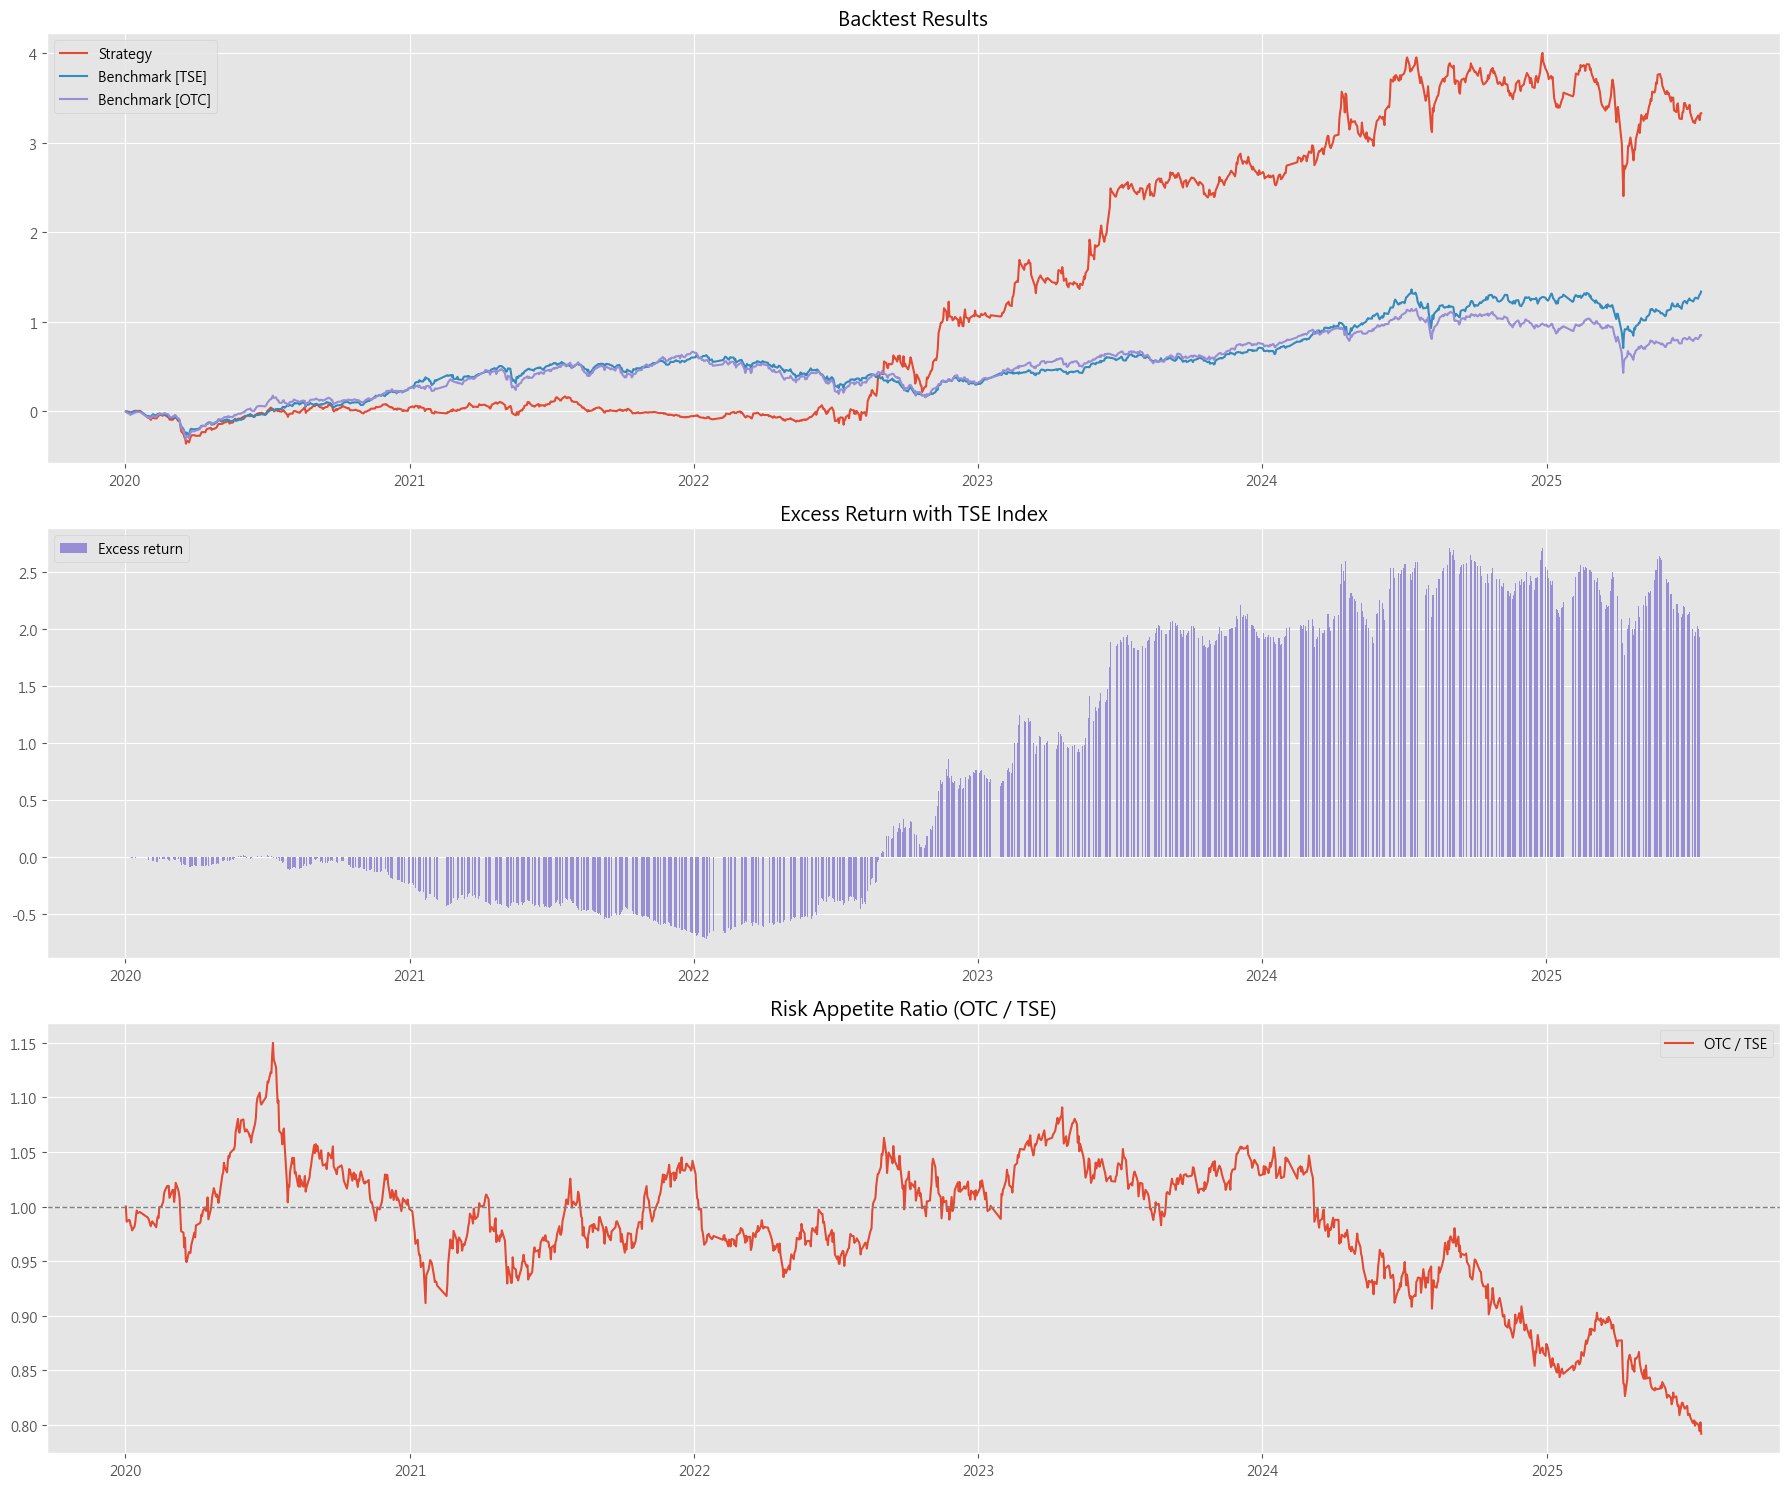

In [ ]:
#%% run_algorithm

results = run_algorithm(
  start         = pd.Timestamp(date_start_pool, tz = 'utc'),
  end           = pd.Timestamp(date_end, tz = 'utc'),
  initialize    = initialize,
  handle_data   = handle_data_1,
  analyze       = analyze,
  bundle        = 'tquant',
  capital_base  = 1e5
  )

# py ==================================================================================================================

## Pyfolio

Start date,2020-01-02
End date,2025-07-18
Total months,64
,Backtest
Annual return,36.239%
Cumulative returns,421.597%
Annual volatility,32.967%
Sharpe ratio,1.10
Calmar ratio,0.95
Stability,0.88
Max drawdown,-38.219%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,38.22,2020-01-20,2020-03-19,2020-07-02,106
1,27.15,2025-02-21,2025-04-09,NaT,NaN
2,25.26,2021-07-19,2022-05-12,2022-08-15,265
3,24.97,2022-09-14,2022-10-21,2022-11-10,41
4,17.26,2024-07-05,2024-08-06,2025-02-21,151


findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the following families were found: Arial Unicode MS
findfont: Generic family 'sans-serif' not found because none of the foll

Top 10 long positions of all time,max
sid,
6533,101.19%
1519,30.53%
3287,28.01%
6015,27.88%
4572,27.15%
3661,25.69%
2722,25.34%
1514,23.35%
3252,23.18%


Top 10 short positions of all time,max
sid,


Top 10 positions of all time,max
sid,
6533,101.19%
1519,30.53%
3287,28.01%
6015,27.88%
4572,27.15%
3661,25.69%
2722,25.34%
1514,23.35%
3252,23.18%


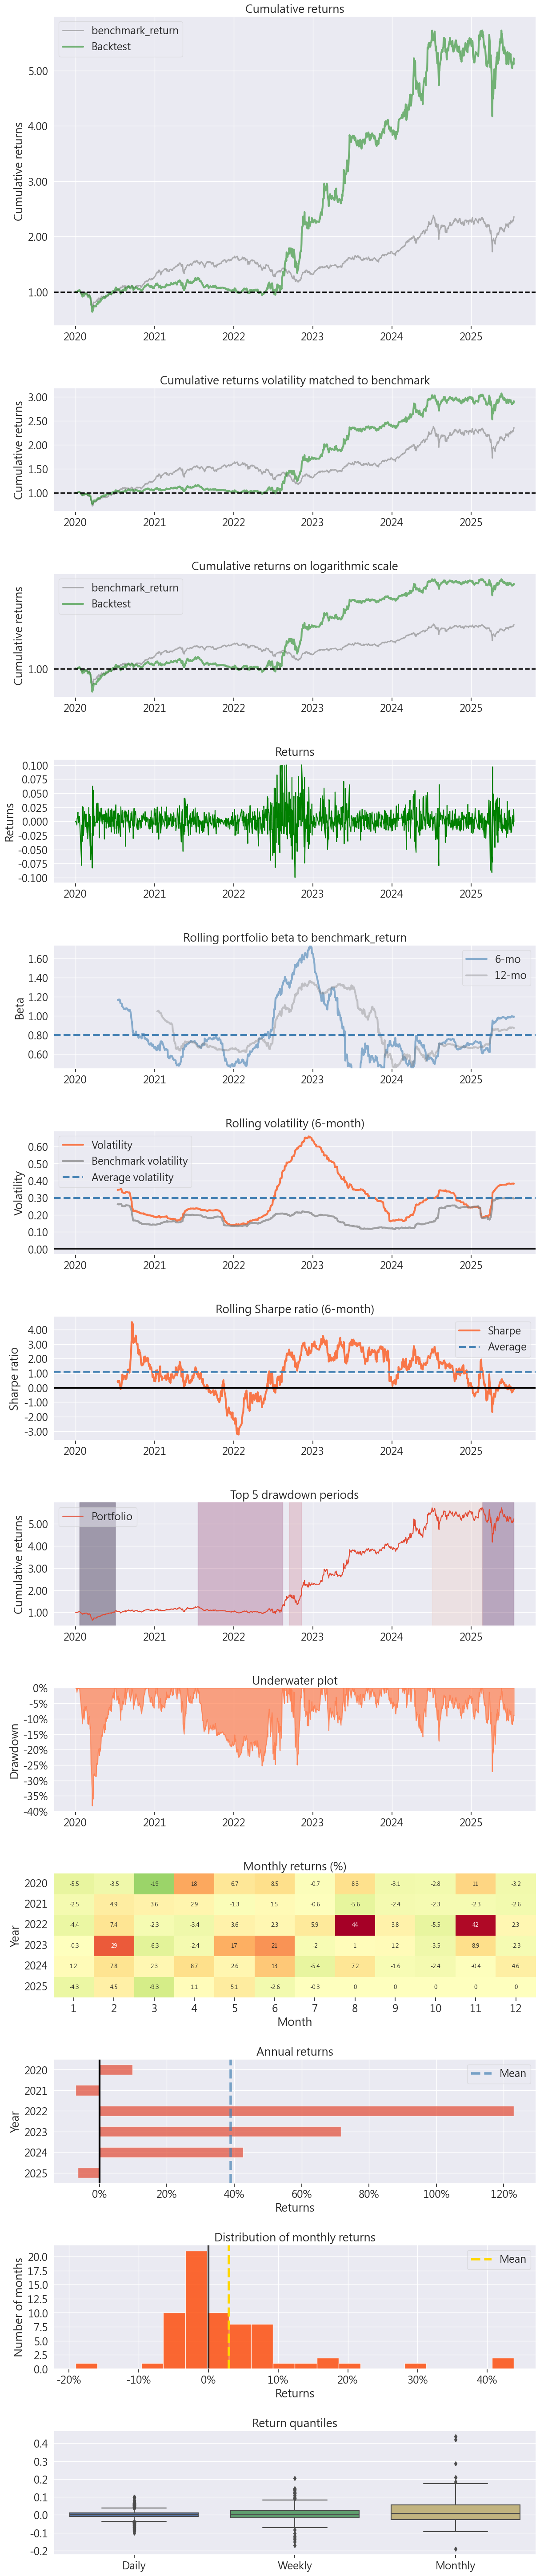

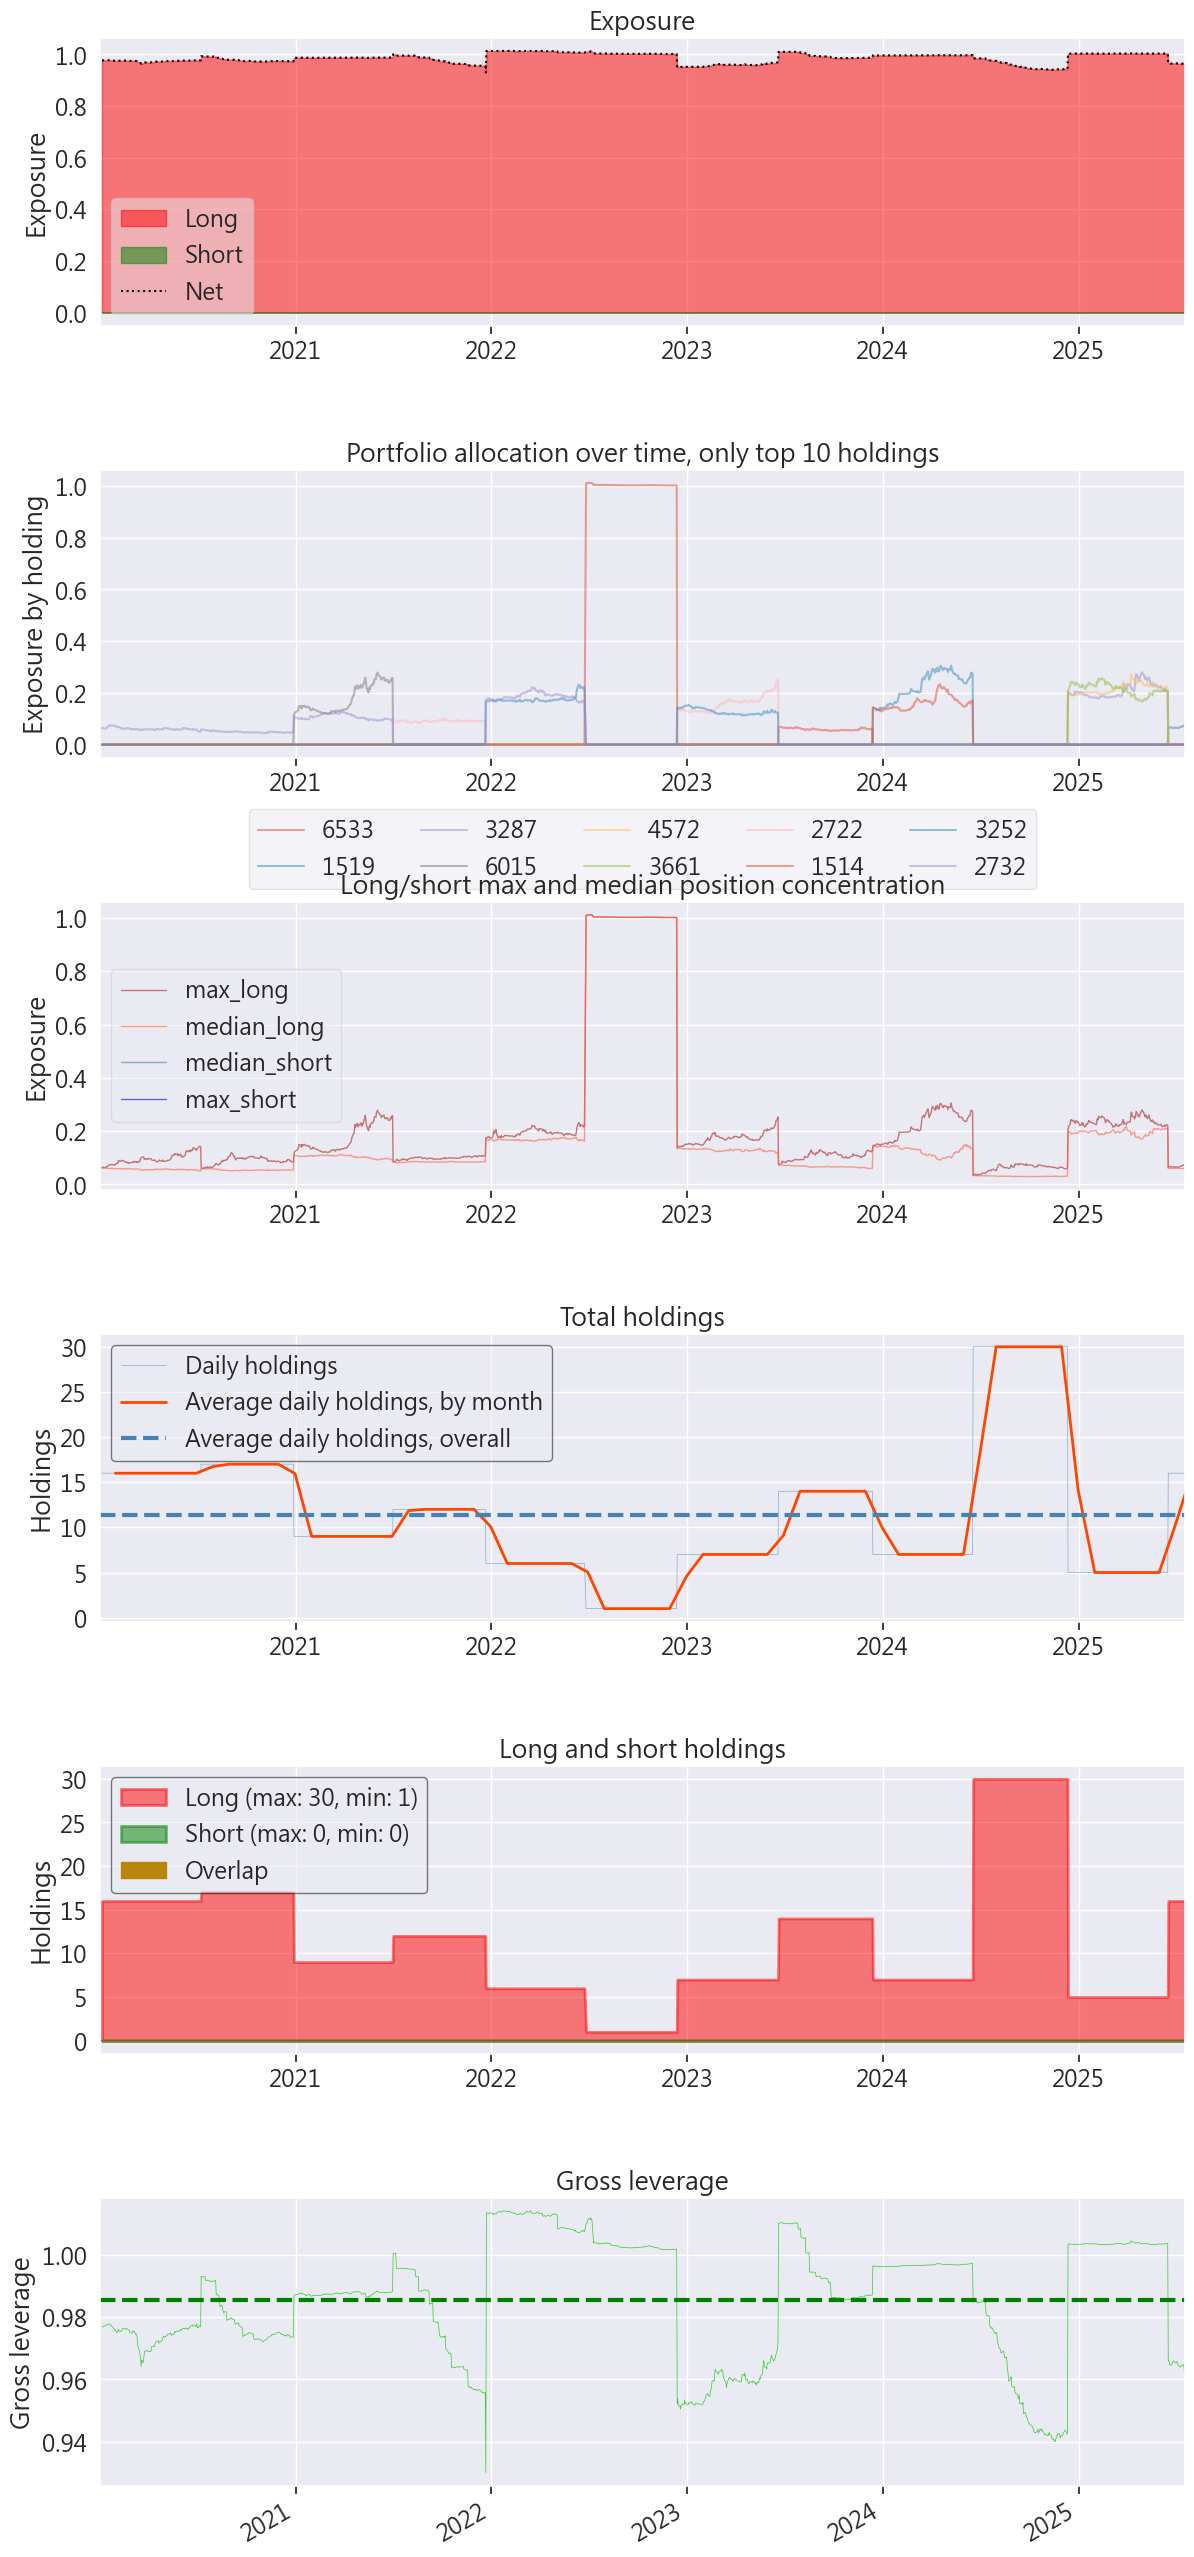

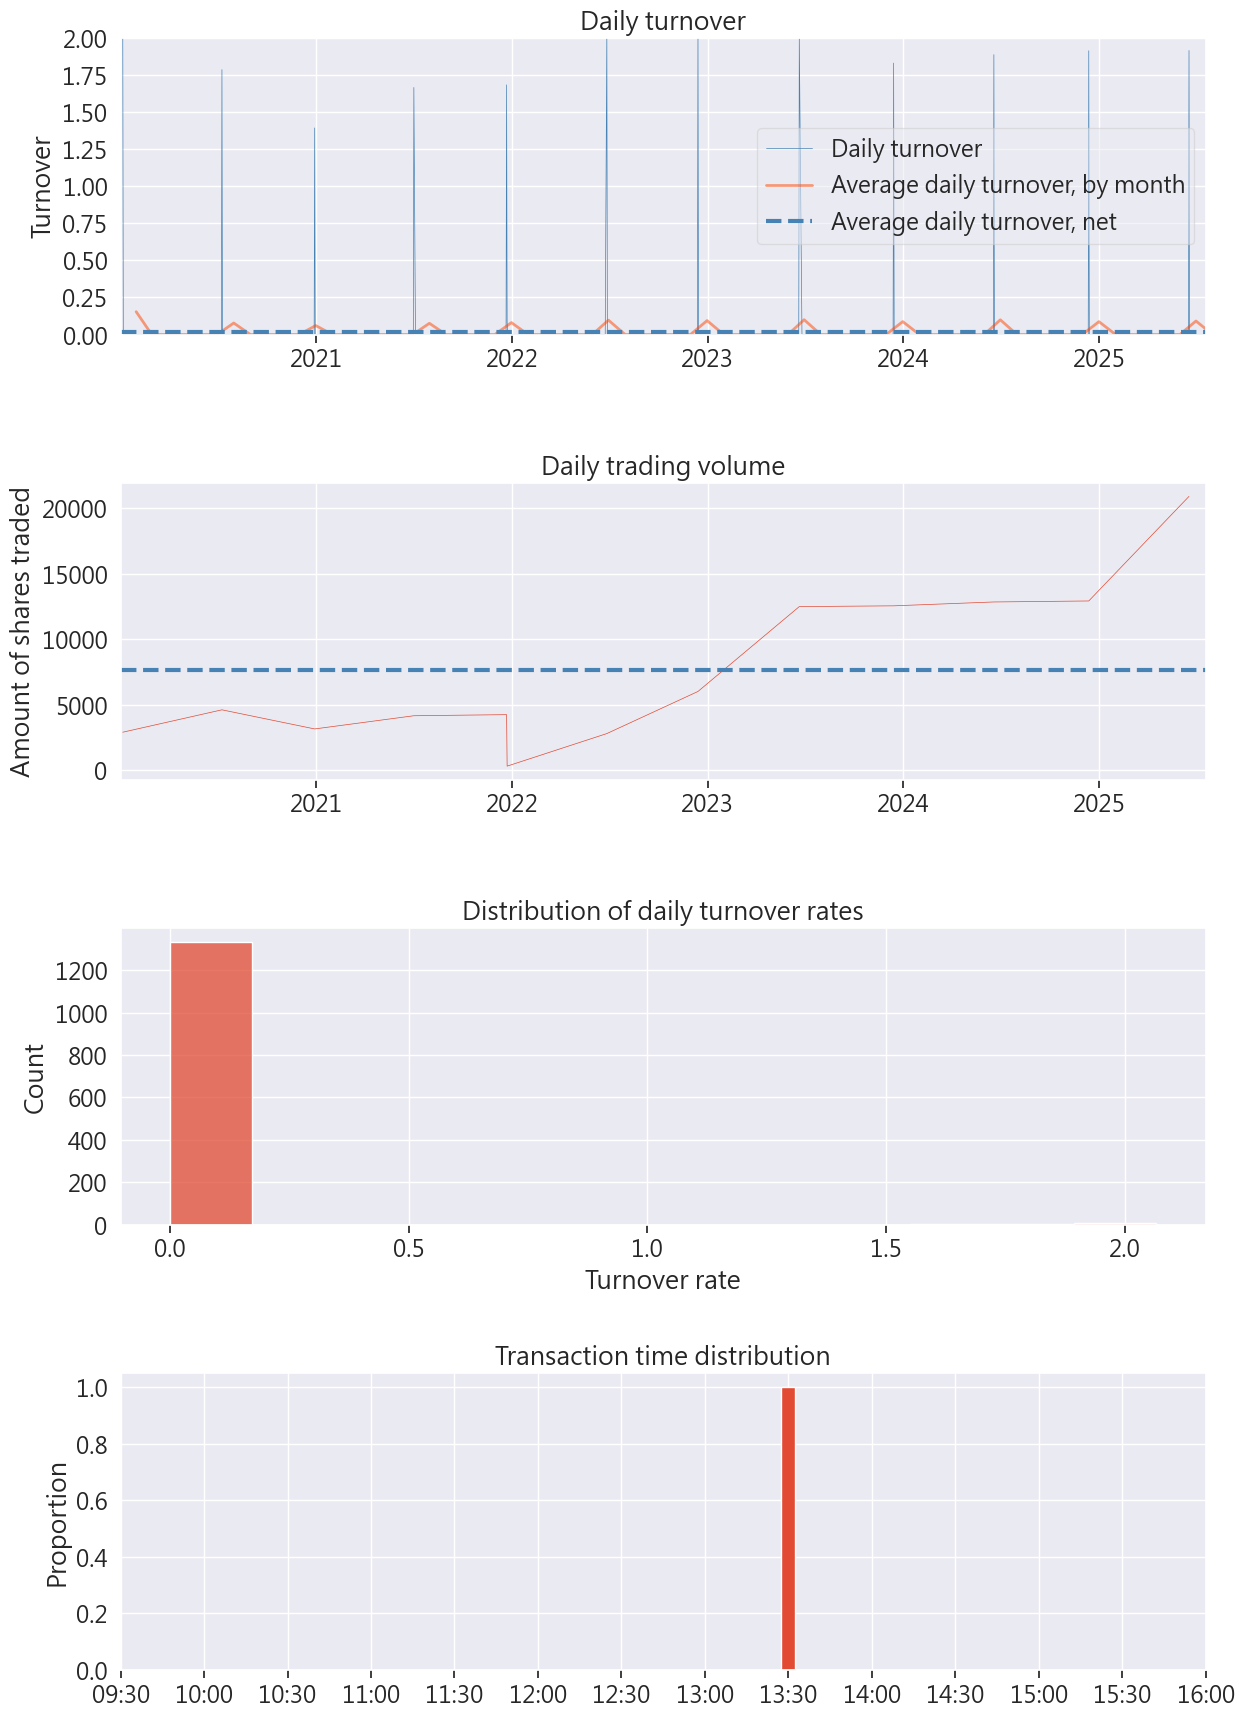

In [ ]:
#%% 計算投組績效

import pyfolio
from pyfolio.utils import extract_rets_pos_txn_from_zipline

import warnings
warnings.filterwarnings("ignore", message="findfont")

# plt.rcParams['font.sans-serif'] = ['Arial']  #, 'Noto Sans CJK TC', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
returns, positions, transactions = extract_rets_pos_txn_from_zipline(results)
benchmark_rets = results.benchmark_return
pyfolio.tears.create_full_tear_sheet(
    returns        = returns,
    positions      = positions,
    transactions   = transactions,
    benchmark_rets = benchmark_rets
    )

In [ ]:
#%% 計算指數績效

def ana(context, perf):
    pass

# perf：str

from pyfolio.plotting import show_perf_stats
perf_stats_str = show_perf_stats(
    returns,
    benchmark_rets,
    positions,
    transactions,
)

show_perf_stats(benchmark_rets)

# perf：tse -----------------------------------------------------------------------------------------------------

def handle_data_tse(context, data):
    if context.i == 0:
        order_target_percent(symbol('IR0001'), 1.0)

    context.i += 1

results_tse = run_algorithm(
            start = pd.Timestamp(back_start, tz = 'utc'),
            end = pd.Timestamp(date_end, tz = 'utc'),
            initialize = initialize,
            handle_data = handle_data_tse,
            analyze = ana,
            bundle = 'tquant',
            capital_base = 1e5)

import pyfolio
from pyfolio.utils import extract_rets_pos_txn_from_zipline
plt.rcParams['font.sans-serif'] = ['Arial', 'Noto Sans CJK TC', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
tse_returns, tse_positions, tse_transactions = extract_rets_pos_txn_from_zipline(results_tse)
tse_benchmark_rets = results_tse.benchmark_return

from pyfolio.plotting import show_perf_stats
perf_stats_tse = show_perf_stats(
    tse_returns,
    tse_benchmark_rets,
    tse_positions,
    tse_transactions,
)

perf_stats_tse.columns = ['TSE']

# perf：otc -----------------------------------------------------------------------------------------------------

def handle_data_otc(context, data):
    if context.i == 0:
        order_target_percent(symbol('IR0043'), 1.0)

    context.i += 1

results_otc = run_algorithm(
            start = pd.Timestamp(back_start, tz = 'utc'),
            end = pd.Timestamp(date_end, tz = 'utc'),
            initialize = initialize,
            handle_data = handle_data_otc,
            analyze = ana,
            bundle = 'tquant',
            capital_base = 1e5)

import pyfolio
from pyfolio.utils import extract_rets_pos_txn_from_zipline
plt.rcParams['font.sans-serif'] = ['Arial', 'Noto Sans CJK TC', 'SimHei']
plt.rcParams['axes.unicode_minus'] = False
otc_returns, otc_positions, otc_transactions = extract_rets_pos_txn_from_zipline(results_otc)
otc_benchmark_rets = results_otc.benchmark_return

from pyfolio.plotting import show_perf_stats
perf_stats_otc = show_perf_stats(
    otc_returns,
    otc_benchmark_rets,
    otc_positions,
    otc_transactions,
)

perf_stats_otc.columns = ['OTC']

Start date,2020-01-02
End date,2025-07-18
Total months,64
,Backtest
Annual return,36.239%
Cumulative returns,421.597%
Annual volatility,32.967%
Sharpe ratio,1.10
Calmar ratio,0.95
Stability,0.88
Max drawdown,-38.219%


Start date,2020-01-02
End date,2025-07-18
Total months,64
,Backtest
Annual return,17.429%
Cumulative returns,135.879%
Annual volatility,19.899%
Sharpe ratio,0.91
Calmar ratio,0.61
Stability,0.80
Max drawdown,-28.553%


Start date,2020-01-02
End date,2025-07-18
Total months,64
,Backtest
Annual return,15.969%
Cumulative returns,120.628%
Annual volatility,18.527%
Sharpe ratio,0.89
Calmar ratio,0.60
Stability,0.80
Max drawdown,-26.737%


Start date,2020-01-02
End date,2025-07-18
Total months,64
,Backtest
Annual return,12.344%
Cumulative returns,86.208%
Annual volatility,21.151%
Sharpe ratio,0.66
Calmar ratio,0.37
Stability,0.77
Max drawdown,-33.14%


In [ ]:
#%% 整理績效比較表
perf_stats_tse.columns = ['TSE']
perf_stats_otc.columns = ['OTC']
perf_stats_summary = pd.concat([perf_stats_str, perf_stats_tse, perf_stats_otc], axis=1)

def show_perf_summary(df):
    def to_float(x):
        if isinstance(x, str):
            x = x.strip().replace(',', '')
            if x.endswith('%'):
                x = x[:-1]  # 去掉 %
            try:
                return float(x)
            except:
                return np.nan
        return x

    df_fmt = df.applymap(to_float).round(3).copy()

    percent_rows = ['Annual return', 'Cumulative returns', 'Annual volatility', 'Max drawdown', 'Daily value at risk']
    other_rows   = df_fmt.index.difference(percent_rows)

    df_fmt.loc[percent_rows] = df_fmt.loc[percent_rows].applymap(lambda v: f"{v:.2f}%")
    df_fmt.loc[other_rows]   = df_fmt.loc[other_rows].applymap(lambda v: f"{v:.3f}")

    print(df_fmt)

show_perf_summary(perf_stats_summary)

                    Backtest      TSE      OTC
Annual return         36.24%   15.97%   12.34%
Cumulative returns   421.60%  120.63%   86.21%
Annual volatility     32.97%   18.53%   21.15%
Sharpe ratio           1.103    0.893    0.657
Calmar ratio           0.948    0.597    0.372
Stability              0.882    0.804    0.774
Max drawdown         -38.22%  -26.74%  -33.14%
Omega ratio            1.230    1.176    1.125
Sortino ratio          1.679    1.245    0.862
Skew                   0.214   -0.601   -1.027
Kurtosis               4.683    8.516    7.437
Tail ratio             1.169    1.014    0.803
Daily value at risk   -4.01%   -2.27%   -2.61%
Gross leverage         0.985    0.933    0.991
Daily turnover         1.656    0.149    0.149
Alpha                  0.219   -0.003   -0.020
Beta                   0.915    0.931    0.884


## plt

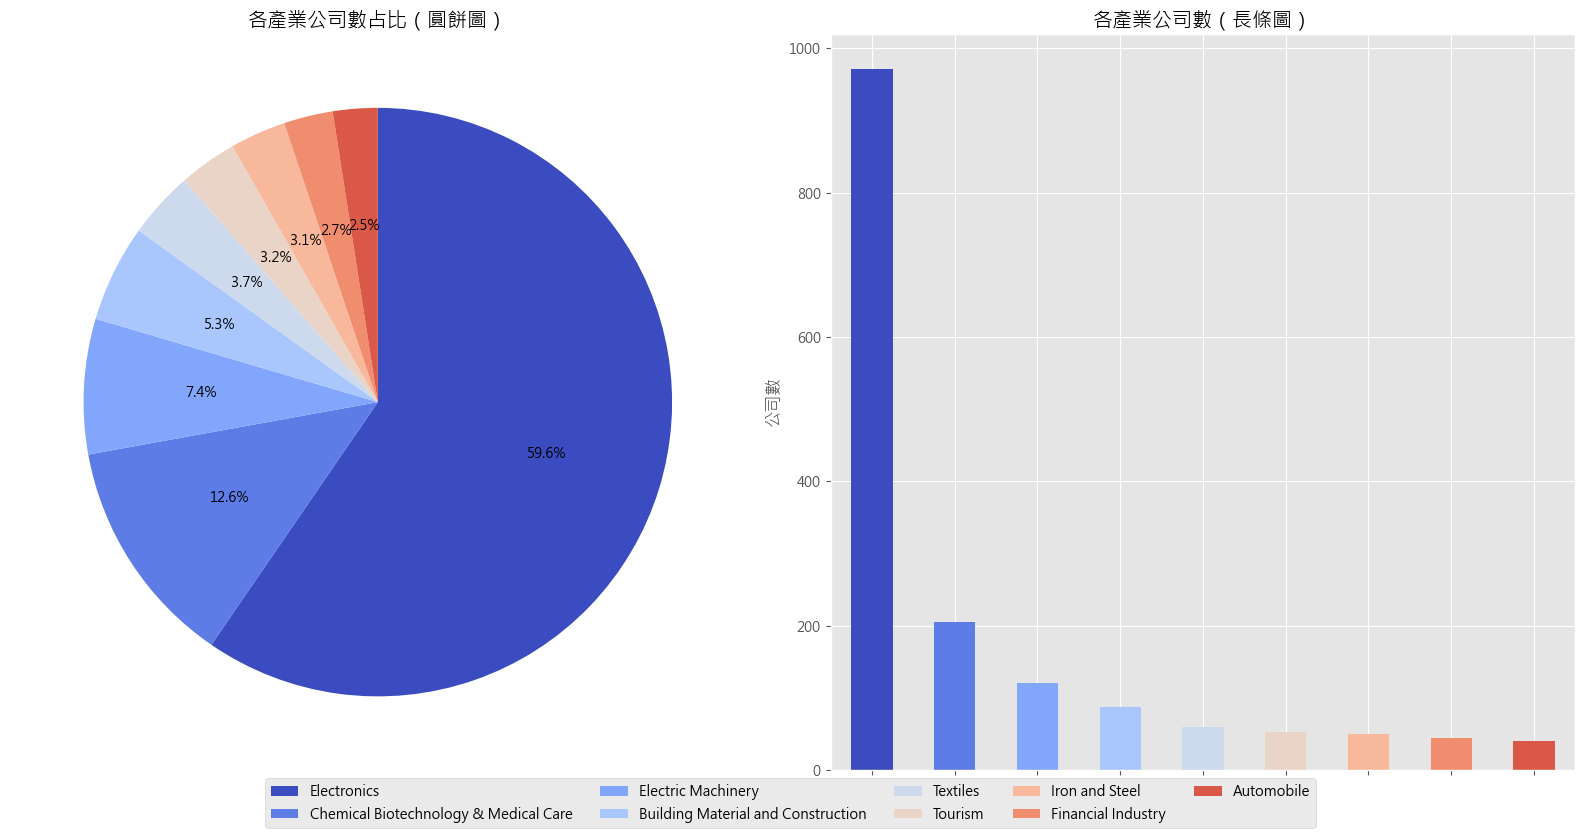

In [ ]:
#%% 資料視覺化：產業公司數

import matplotlib.pyplot as plt

fig, axes   = plt.subplots(1, 2, figsize=(16, 8))
cmap        = plt.get_cmap('coolwarm')  # 可改成 'tab20c', 'cool', 'YlGnBu_r' 等
colors      = [cmap(i / len(industry_company_no)) for i in range(len(industry_company_no))]

# 圓餅圖
industry_company_no.plot.pie(
    ax=axes[0],
    labels=None,                    # 不顯示 Uniname
    autopct='%1.1f%%',
    startangle=90,
    counterclock=False,
    textprops={'fontsize': 10},
    colors=colors
)
axes[0].set_title('各產業公司數占比（圓餅圖）')
axes[0].set_ylabel('')

# 長條圖（去掉 x 軸標籤）
sorted_series = industry_company_no.sort_values(ascending=False)
sorted_colors = [cmap(i / len(sorted_series)) for i in range(len(sorted_series))]

sorted_series.plot.bar(
    ax=axes[1],
    color=sorted_colors
)
axes[1].set_title('各產業公司數（長條圖）')
axes[1].set_xlabel('')
axes[1].set_ylabel('公司數')
axes[1].tick_params(axis='x', labelbottom=False)  # 移除 x 軸標籤（Uniname）

# 兩圖共用一個圖例（放在下方中央）
fig.legend(
    labels=industry_company_no.index,
    loc='lower center',
    ncol=5,                          # 依產業數量調整欄數
    fontsize=10,
    bbox_to_anchor=(0.5, -0.05)      # 圖例位置略微下移
)

plt.tight_layout()
plt.show()